In [1]:
import librosa
import numpy as np

In [2]:
from medhok import get_dataset as ds

speech_mel, dialects = ds.load_features(normalised=True)

Using normalisation method: True
Loading Ngadas: 
- Marsam.wav (time: 0.8)
- Mas_Tom_Ngadas_201102.wav (time: 0.0)
Loading Banten: 
- JWBP-20121229-A.wav (time: 0.1)
- JWBA-20100703-a.wav (time: 0.1)
- JWB-Banten_9.wav (time: 0.2)
- banten-2010-07-02-a.wav (time: 0.2)
- JWB-20090125.wav (time: 0.2)
- JWBP-20121229-B.wav (time: 0.0)
- JWB-Banten_10.wav (time: 0.0)
- JWB-20090126.wav (time: 0.2)
- JWB-20090116.wav (time: 0.1)
- JWB-Banten20100605-B.wav (time: 0.0)
- JWB-Banten_1.wav (time: 0.0)
- JWB-Banten_6.wav (time: 0.0)
- JWBA-20100703-b.wav (time: 0.0)
- JWB-Banten_4.wav (time: 0.0)
- JWB-20090117.wav (time: 0.1)
- JWB-20090118.wav (time: 0.0)
- JWB-Banten_8.wav (time: 0.0)
- JWB-20090131.wav (time: 0.3)
- JWB-20090130.wav (time: 0.2)
- JWB-Banten_11.wav (time: 0.0)
- JWB-Banten_5.wav (time: 0.0)
- JWB-20090123.wav (time: 0.0)
- JWB-20090124.wav (time: 0.1)
- JWB-20090127.wav (time: 0.2)
- JWB-Banten_19.wav (time: 0.0)
- JWB-Banten20100605-A.wav (time: 0.1)
- JWB-Banten_7.wav (time

In [3]:
from pympler.asizeof import asizeof

print('Loaded dataset size in RAM: {a:2.2f}GB'.format(a=asizeof(speech_mel) / 1e9))

Loaded dataset size in RAM: 3.19GB


In [4]:
speech_mel[0].shape

(128, 81857)

In [5]:
dialects[0]

'Ngadas'

In [6]:
# Window split
from medhok import preprocessing as pre

speech_mel_split = list()
dialects_split = list()

for feature, dialect in zip(speech_mel, dialects):
    temp = pre.split_window(feature)
    for w in temp:
        speech_mel_split.append(w)
        dialects_split.append(dialect)

# Turning feature to ndarray. Do note that we are adding a dimension; this ensures that TensorFlow reads our feature like how images are supposed to be read: (batch (negligible), x1, x2, channels).
speech_mel_split = np.array(speech_mel_split, dtype=np.float32)[:, :, :, np.newaxis]
dialects_split = np.array(dialects_split)#[:, np.newaxis]

# speech_mel = pd.DataFrame(speech_mel_split_list, columns=['feature', 'dialect'])
# speech_mel.head()

In [7]:
print("Mel spectrogram data shape: {}".format(speech_mel_split.shape))
print("Dialects data shape: {}".format(dialects_split.shape))

Mel spectrogram data shape: (41594, 128, 150, 1)
Dialects data shape: (41594,)


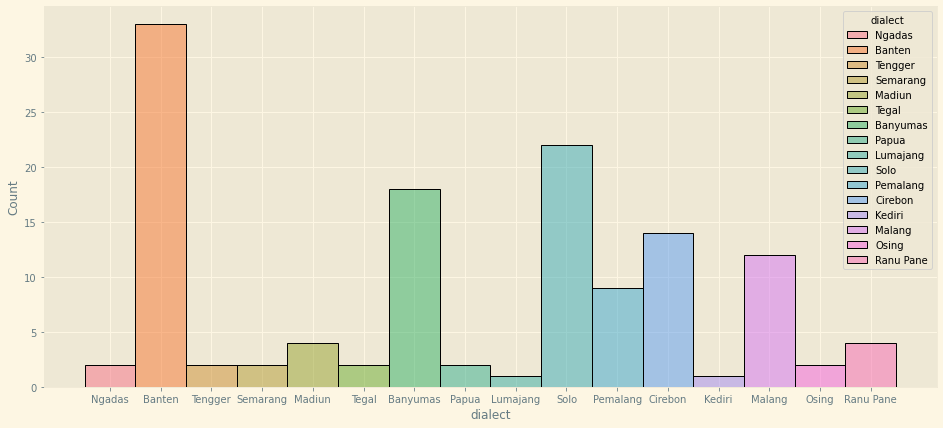

In [8]:
import pandas as pd

# Creating a dialects pandas dataframe for visualization
dialects_df = pd.DataFrame(dialects, columns=['dialect'])

# Full distribution
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')

plt.figure(figsize=(16, 7))
sns.histplot(dialects_df, x='dialect', hue='dialect')

plt.savefig('../visualization/dialect-distribution.png')
plt.show()

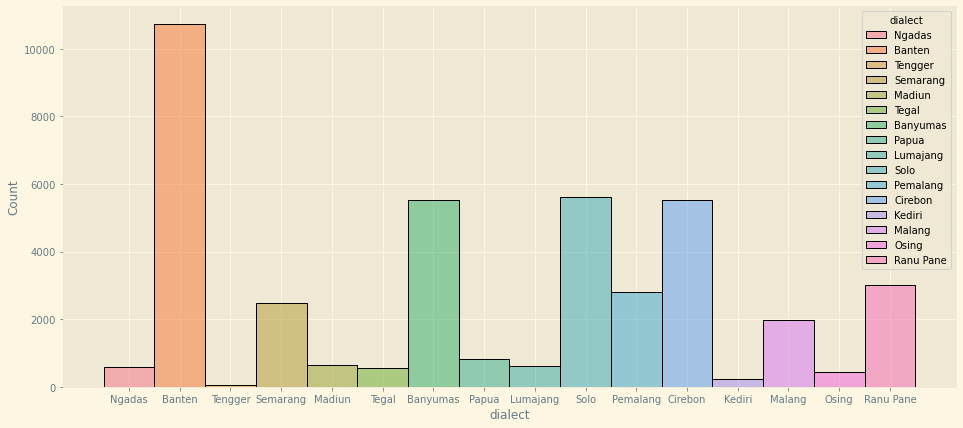

In [9]:
import pandas as pd

# Creating a dialects pandas dataframe for visualization
dialects_split_df = pd.DataFrame(dialects_split, columns=['dialect'])

# Full distribution
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')

plt.figure(figsize=(16, 7))
sns.histplot(dialects_split_df, x='dialect', hue='dialect')

plt.savefig('../visualization/dialect-distribution-windowed.png')
plt.show()

In [10]:
# Cleanup
import gc

# Dataframes
del dialects_df, dialects_split_df

# Loop variables
del temp, dialect, feature, w

# Initial variables
del dialects, speech_mel

gc.collect()

20012

In [11]:
dialects_split

array(['Ngadas', 'Ngadas', 'Ngadas', ..., 'Ranu Pane', 'Ranu Pane',
       'Ranu Pane'], dtype='<U9')

In [12]:
# One-hot encoding of dialects
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(dialects_split)

dialects_number = encoder.transform(dialects_split).astype(np.uint8)
print(dialects_number[0])

7


In [13]:
dialects_split

array(['Ngadas', 'Ngadas', 'Ngadas', ..., 'Ranu Pane', 'Ranu Pane',
       'Ranu Pane'], dtype='<U9')

In [14]:
dialects_number

array([ 7,  7,  7, ..., 11, 11, 11], dtype=uint8)

In [15]:
encoder.classes_

array(['Banten', 'Banyumas', 'Cirebon', 'Kediri', 'Lumajang', 'Madiun',
       'Malang', 'Ngadas', 'Osing', 'Papua', 'Pemalang', 'Ranu Pane',
       'Semarang', 'Solo', 'Tegal', 'Tengger'], dtype='<U9')

In [16]:
# Test - return a label.

encoder.inverse_transform([dialects_number[0]])

array(['Ngadas'], dtype='<U9')

Temporary conclusion: we see that several dialects (such as Tengger, Kediri, or the Osing language) lacks data. We can mitigate this by using resampling by data augmentation (can lead to false positives!) or to dump the dialects instead.

In [17]:
from sklearn.model_selection import train_test_split

X_mel_train, X_mel_test, y_train, y_test = train_test_split(
    speech_mel_split,
    dialects_split,
    train_size=0.8,
    random_state=42
)

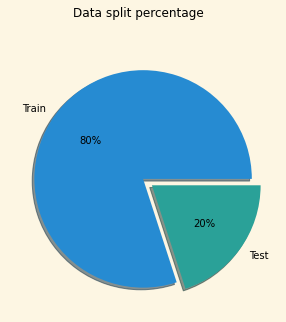

In [18]:
# Distribution of data overall

plt.figure(figsize=(5, 5))
plt.suptitle('Data split percentage')
plt.pie([X_mel_train.shape[0], X_mel_test.shape[0]], explode=[0.0, 0.1], labels=['Train', 'Test'], shadow=True, autopct='%2.f%%')

plt.show()

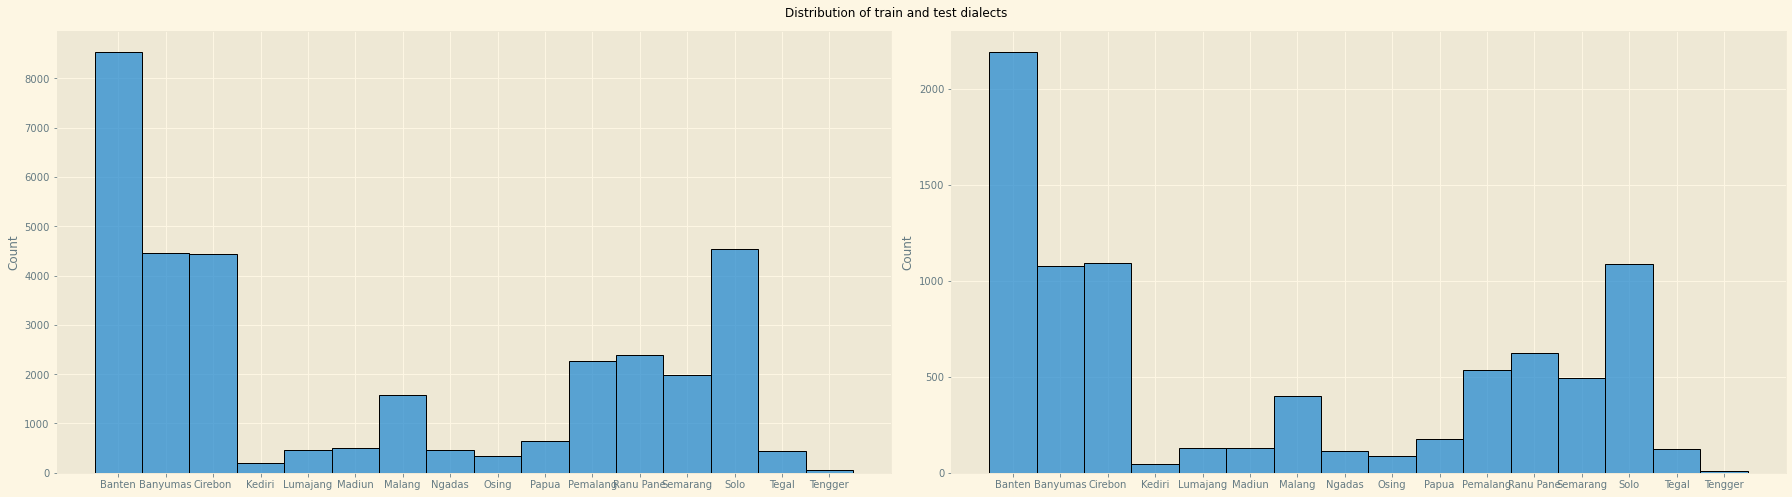

In [19]:
# Presentation of distribution
fig, ax = plt.subplots(1, 2, figsize=(25, 7))
plt.suptitle('Distribution of train and test dialects')

sns.histplot(sorted(y_train.reshape(-1)), ax=ax[0])
sns.histplot(sorted(y_test.reshape(-1)), ax=ax[1])

plt.tight_layout()
plt.savefig('../visualization/distribution-train-test.png')
plt.show()

/tmp/ipykernel_10174/381011803.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


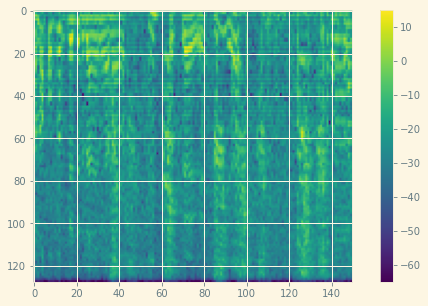

(128, 150, 1)

In [20]:
# Rough illustration
plt.figure(figsize=(10, 5))

plt.imshow(librosa.power_to_db(X_mel_train[0]))
plt.colorbar()
plt.show()

X_mel_train[0].shape

In [21]:
# Now that illustration is done, we are transforming y to numbered data

y_train = encoder.transform(y_train).astype(np.uint8)
y_test = encoder.transform(y_test).astype(np.uint8)

In [22]:
y_train

array([1, 0, 0, ..., 8, 0, 1], dtype=uint8)

In [23]:
# Cleaning house.

del fig, ax, dialects_split, speech_mel_split, dialects_number
gc.collect()

17770

In [24]:
import tensorflow as tf

# Checking for GPU availability. If shown none, set up CUDA+cuDNN
tf.config.list_physical_devices('GPU')

2022-02-18 21:48:13.378389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 21:48:13.410853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 21:48:13.411100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
tf.keras.backend.clear_session()

# TODO: add hidden layers, or use dropout
def create_model(feature='mel_spec', arch='cnn'):
    """
    Creates a TensorFlow model.
    :param feature: Audio feature used. Defaults to Mel spectrogram
    :param arch: Neural network architecture used. Defaults to CNN.
    :return: tensorflow.keras.Model
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(128, 150, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(16, activation=None)
    ])
    # Input
    # if feature == 'mel_spec':
    #     model.add(tf.keras.layers.Conv2D)
    # # Arch
    # if arch == 'cnn':
    #     model.add(tf.keras.layers.Conv2D)
    return model

model_mel_spec_cnn = create_model(feature='mel_spec', arch='cnn')
model_mel_spec_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 17, 128)      0

2022-02-18 21:48:13.538987: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-18 21:48:13.540030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 21:48:13.540546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 21:48:13.541286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [26]:
import tensorflow_addons as tfa

model_mel_spec_cnn.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    # optimizer=tf.keras.optimizers.RMSprop(),
    optimizer='adam',
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.Accuracy(),
        # tf.keras.metrics.CategoricalAccuracy(),
        # tf.keras.metrics.Precision(),
        # tf.keras.metrics.Recall(),
        # tfa.metrics.F1Score(num_classes=16)
    ]
)

In [27]:
from medhok import constants as c

# ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
#         filepath=c.CHECKPOINT_DIR / ('model_' +
#         'mel_spectrogram-cnn-nb' + '/'),
#         save_weights_only=True,
#         verbose=1
#     )

In [28]:
X_mel_train.shape

(33275, 128, 150, 1)

In [29]:
y_train

array([1, 0, 0, ..., 8, 0, 1], dtype=uint8)

In [30]:
type(y_train)

numpy.ndarray

In [36]:
# Training step.

history = model_mel_spec_cnn.fit(
    x=X_mel_train,
    y=y_train,
    batch_size=32, # 64
    epochs=50,
    # validation_data=(X_mel_test, y_test.astype(np.uint8)),
    steps_per_epoch=128,
    # callbacks=[ckpt_callback]
)

2022-02-18 21:46:55.805532: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2555520000 exceeds 10% of free system memory.
2022-02-18 21:47:06.637024: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB (rounded to 2555520000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-02-18 21:47:06.637076: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-02-18 21:47:06.637098: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 27, Chunks in use: 27. 6.8KiB allocated for chunks. 6.8KiB in use in bin. 804B client-requested in use in bin.
2022-02-18 21:47:06.637117: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 2, C

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

:06.637535: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000700 of size 256 next 4
2022-02-18 21:47:06.637546: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000800 of size 256 next 5
2022-02-18 21:47:06.637557: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000900 of size 256 next 6
2022-02-18 21:47:06.637569: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000a00 of size 256 next 9
2022-02-18 21:47:06.637580: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000b00 of size 256 next 10
2022-02-18 21:47:06.637591: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000c00 of size 256 next 11
2022-02-18 21:47:06.637602: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000d00 of size 256 next 14
2022-02-18 21:47:06.637613: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f1e6a000e00 of size 256 next 15
2022-02-18 2

In [ ]:
# Model visualisation - for now

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Plots of model performance')

ax[0].plot(history.history['loss'], 'r')
ax[0].plot(history.history['val_loss'], 'g')
ax[1].plot(history.history['categorical_accuracy'], 'r')
ax[1].plot(history.history['val_categorical_accuracy'], 'g')
ax[0].grid()
ax[1].grid()

plt.savefig('../visualization/1-model-performance.png')
plt.show()

In [ ]:
# TODO: data augmentation, regularisation

In [ ]:
onehot.categories_[0][0]

In [ ]:
metrics = model_mel_spec_cnn.evaluate(X_mel_test, y_test)
print("""Model training validation result:
Loss\t\t: {},
Accuracy\t: {},
Precision\t: {},
Recall\t\t: {},

F1 score per categories:""".format(
    metrics[0], metrics[1], metrics[2], metrics[3]
))
for i in range(len(metrics[4])):
    print('\t' + onehot.categories_[0][i] + ':', str(metrics[4][i]))

In [ ]:
# Saving model.
model_mel_spec_cnn.save('../model/model_mel_spec_cnn_nb')
model_mel_spec_cnn.save_weights('../model/weights/model_mel_spec_cnn_nb/')